# The Aharonov-Bohm Effect

## Introduction

The **Aharonov-Bohm (AB) effect**, predicted by Yakir Aharonov and David Bohm in 1959, is one of the most profound demonstrations that the electromagnetic potentials $\mathbf{A}$ and $\phi$ have direct physical significance in quantum mechanics, beyond merely being mathematical conveniences for calculating the fields $\mathbf{E}$ and $\mathbf{B}$.

In classical electromagnetism, only the fields $\mathbf{E}$ and $\mathbf{B}$ have physical meaning—the potentials are considered gauge-dependent artifacts. However, the Aharonov-Bohm effect reveals that in quantum mechanics, charged particles can be influenced by electromagnetic potentials even in regions where the fields $\mathbf{E}$ and $\mathbf{B}$ vanish identically.

## Theoretical Framework

### The Magnetic Aharonov-Bohm Effect

Consider an electron traversing a region where the magnetic field $\mathbf{B} = 0$, but the vector potential $\mathbf{A} \neq 0$. This occurs outside an infinitely long, thin solenoid carrying magnetic flux $\Phi$.

The wavefunction of a charged particle in the presence of an electromagnetic potential acquires a phase:

$$\psi(\mathbf{r}) = \psi_0(\mathbf{r}) \exp\left(\frac{iq}{\hbar} \int_{\mathbf{r}_0}^{\mathbf{r}} \mathbf{A} \cdot d\mathbf{l}\right)$$

where $q$ is the particle's charge, $\hbar$ is the reduced Planck constant, and the integral is taken along a path from a reference point $\mathbf{r}_0$ to the position $\mathbf{r}$.

### Phase Difference in a Double-Slit Experiment

In the classic AB setup, electrons pass on either side of a solenoid. The phase difference between the two paths is:

$$\Delta\phi = \frac{q}{\hbar} \oint \mathbf{A} \cdot d\mathbf{l} = \frac{q}{\hbar} \Phi_B$$

where we used Stokes' theorem:

$$\oint \mathbf{A} \cdot d\mathbf{l} = \int_S (\nabla \times \mathbf{A}) \cdot d\mathbf{S} = \int_S \mathbf{B} \cdot d\mathbf{S} = \Phi_B$$

For an electron ($q = -e$), the phase shift becomes:

$$\Delta\phi = -\frac{e\Phi_B}{\hbar} = -2\pi\frac{\Phi_B}{\Phi_0}$$

where $\Phi_0 = h/e = 2\pi\hbar/e$ is the **magnetic flux quantum**.

### Interference Pattern

The interference pattern at the detector depends on the total phase difference, which includes both the geometric phase (from path length difference) and the AB phase:

$$I(y) \propto \left|\psi_1 + \psi_2\right|^2 = \left|\psi_0\right|^2 \left|e^{i\phi_1} + e^{i\phi_2}\right|^2$$

$$I(y) \propto 2\left|\psi_0\right|^2 \left[1 + \cos(\Delta\phi_{\text{geom}} + \Delta\phi_{\text{AB}})\right]$$

The geometric phase difference for a double-slit configuration is:

$$\Delta\phi_{\text{geom}} = \frac{2\pi d \sin\theta}{\lambda} \approx \frac{2\pi d y}{\lambda L}$$

where $d$ is the slit separation, $\lambda$ is the de Broglie wavelength, $L$ is the distance to the screen, and $y$ is the position on the screen.

## Physical Significance

The Aharonov-Bohm effect has profound implications:

1. **Non-locality**: The electron is affected by the magnetic flux even though it never enters the region where $\mathbf{B} \neq 0$.

2. **Gauge invariance**: While $\mathbf{A}$ is gauge-dependent, the phase difference around a closed loop is gauge-invariant.

3. **Topology**: The effect is fundamentally topological—it depends on the flux enclosed by the paths, not on local field values.

4. **Flux quantization**: In superconducting rings, the AB effect leads to flux quantization in units of $\Phi_0/2$ (due to Cooper pairs with charge $2e$).

## Numerical Simulation

We will simulate the interference pattern for electrons in a double-slit setup with a solenoid placed between the slits. We'll visualize how the interference fringes shift as the magnetic flux through the solenoid varies.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Physical constants (SI units)
hbar = 1.054571817e-34  # Reduced Planck constant [J·s]
e = 1.602176634e-19      # Elementary charge [C]
m_e = 9.1093837015e-31   # Electron mass [kg]

# Flux quantum
Phi_0 = 2 * np.pi * hbar / e  # h/e = 2π·ℏ/e

print(f"Magnetic flux quantum Φ₀ = h/e = {Phi_0:.6e} Wb")
print(f"Φ₀ = {Phi_0 * 1e15:.4f} fWb (femtowebers)")

Magnetic flux quantum Φ₀ = h/e = 4.135668e-15 Wb
Φ₀ = 4.1357 fWb (femtowebers)


In [2]:
def interference_intensity(y, d, L, wavelength, flux_ratio):
    """
    Calculate the interference intensity in an Aharonov-Bohm double-slit experiment.
    
    Parameters:
    -----------
    y : array_like
        Position on the detection screen [m]
    d : float
        Slit separation [m]
    L : float
        Distance from slits to screen [m]
    wavelength : float
        de Broglie wavelength of electron [m]
    flux_ratio : float
        Magnetic flux through solenoid in units of Φ₀ (Φ/Φ₀)
    
    Returns:
    --------
    intensity : array_like
        Normalized interference intensity
    """
    # Geometric phase difference
    phi_geom = 2 * np.pi * d * y / (wavelength * L)
    
    # Aharonov-Bohm phase shift
    phi_AB = 2 * np.pi * flux_ratio
    
    # Total intensity (normalized)
    intensity = 0.5 * (1 + np.cos(phi_geom + phi_AB))
    
    # Include single-slit diffraction envelope
    slit_width = d / 5  # Assume slit width is 1/5 of separation
    beta = np.pi * slit_width * y / (wavelength * L)
    # Avoid division by zero
    with np.errstate(divide='ignore', invalid='ignore'):
        envelope = np.where(np.abs(beta) < 1e-10, 1.0, (np.sin(beta) / beta)**2)
    
    return intensity * envelope

In [3]:
# Experimental parameters (realistic for electron microscope setup)
electron_energy_eV = 50e3  # 50 keV electrons (typical TEM)
electron_energy_J = electron_energy_eV * e

# de Broglie wavelength: λ = h/p = h/√(2mE)
# For relativistic correction: p = √(2mE + E²/c²), but at 50 keV it's small
wavelength = 2 * np.pi * hbar / np.sqrt(2 * m_e * electron_energy_J)

print(f"Electron energy: {electron_energy_eV/1e3:.1f} keV")
print(f"de Broglie wavelength: λ = {wavelength*1e12:.4f} pm")

# Setup geometry
d = 500e-9      # Slit separation: 500 nm
L = 1.0         # Screen distance: 1 m

print(f"Slit separation: d = {d*1e9:.0f} nm")
print(f"Screen distance: L = {L:.2f} m")

# Fringe spacing
fringe_spacing = wavelength * L / d
print(f"Fringe spacing: Δy = λL/d = {fringe_spacing*1e6:.2f} μm")

Electron energy: 50.0 keV
de Broglie wavelength: λ = 5.4847 pm
Slit separation: d = 500 nm
Screen distance: L = 1.00 m
Fringe spacing: Δy = λL/d = 10.97 μm


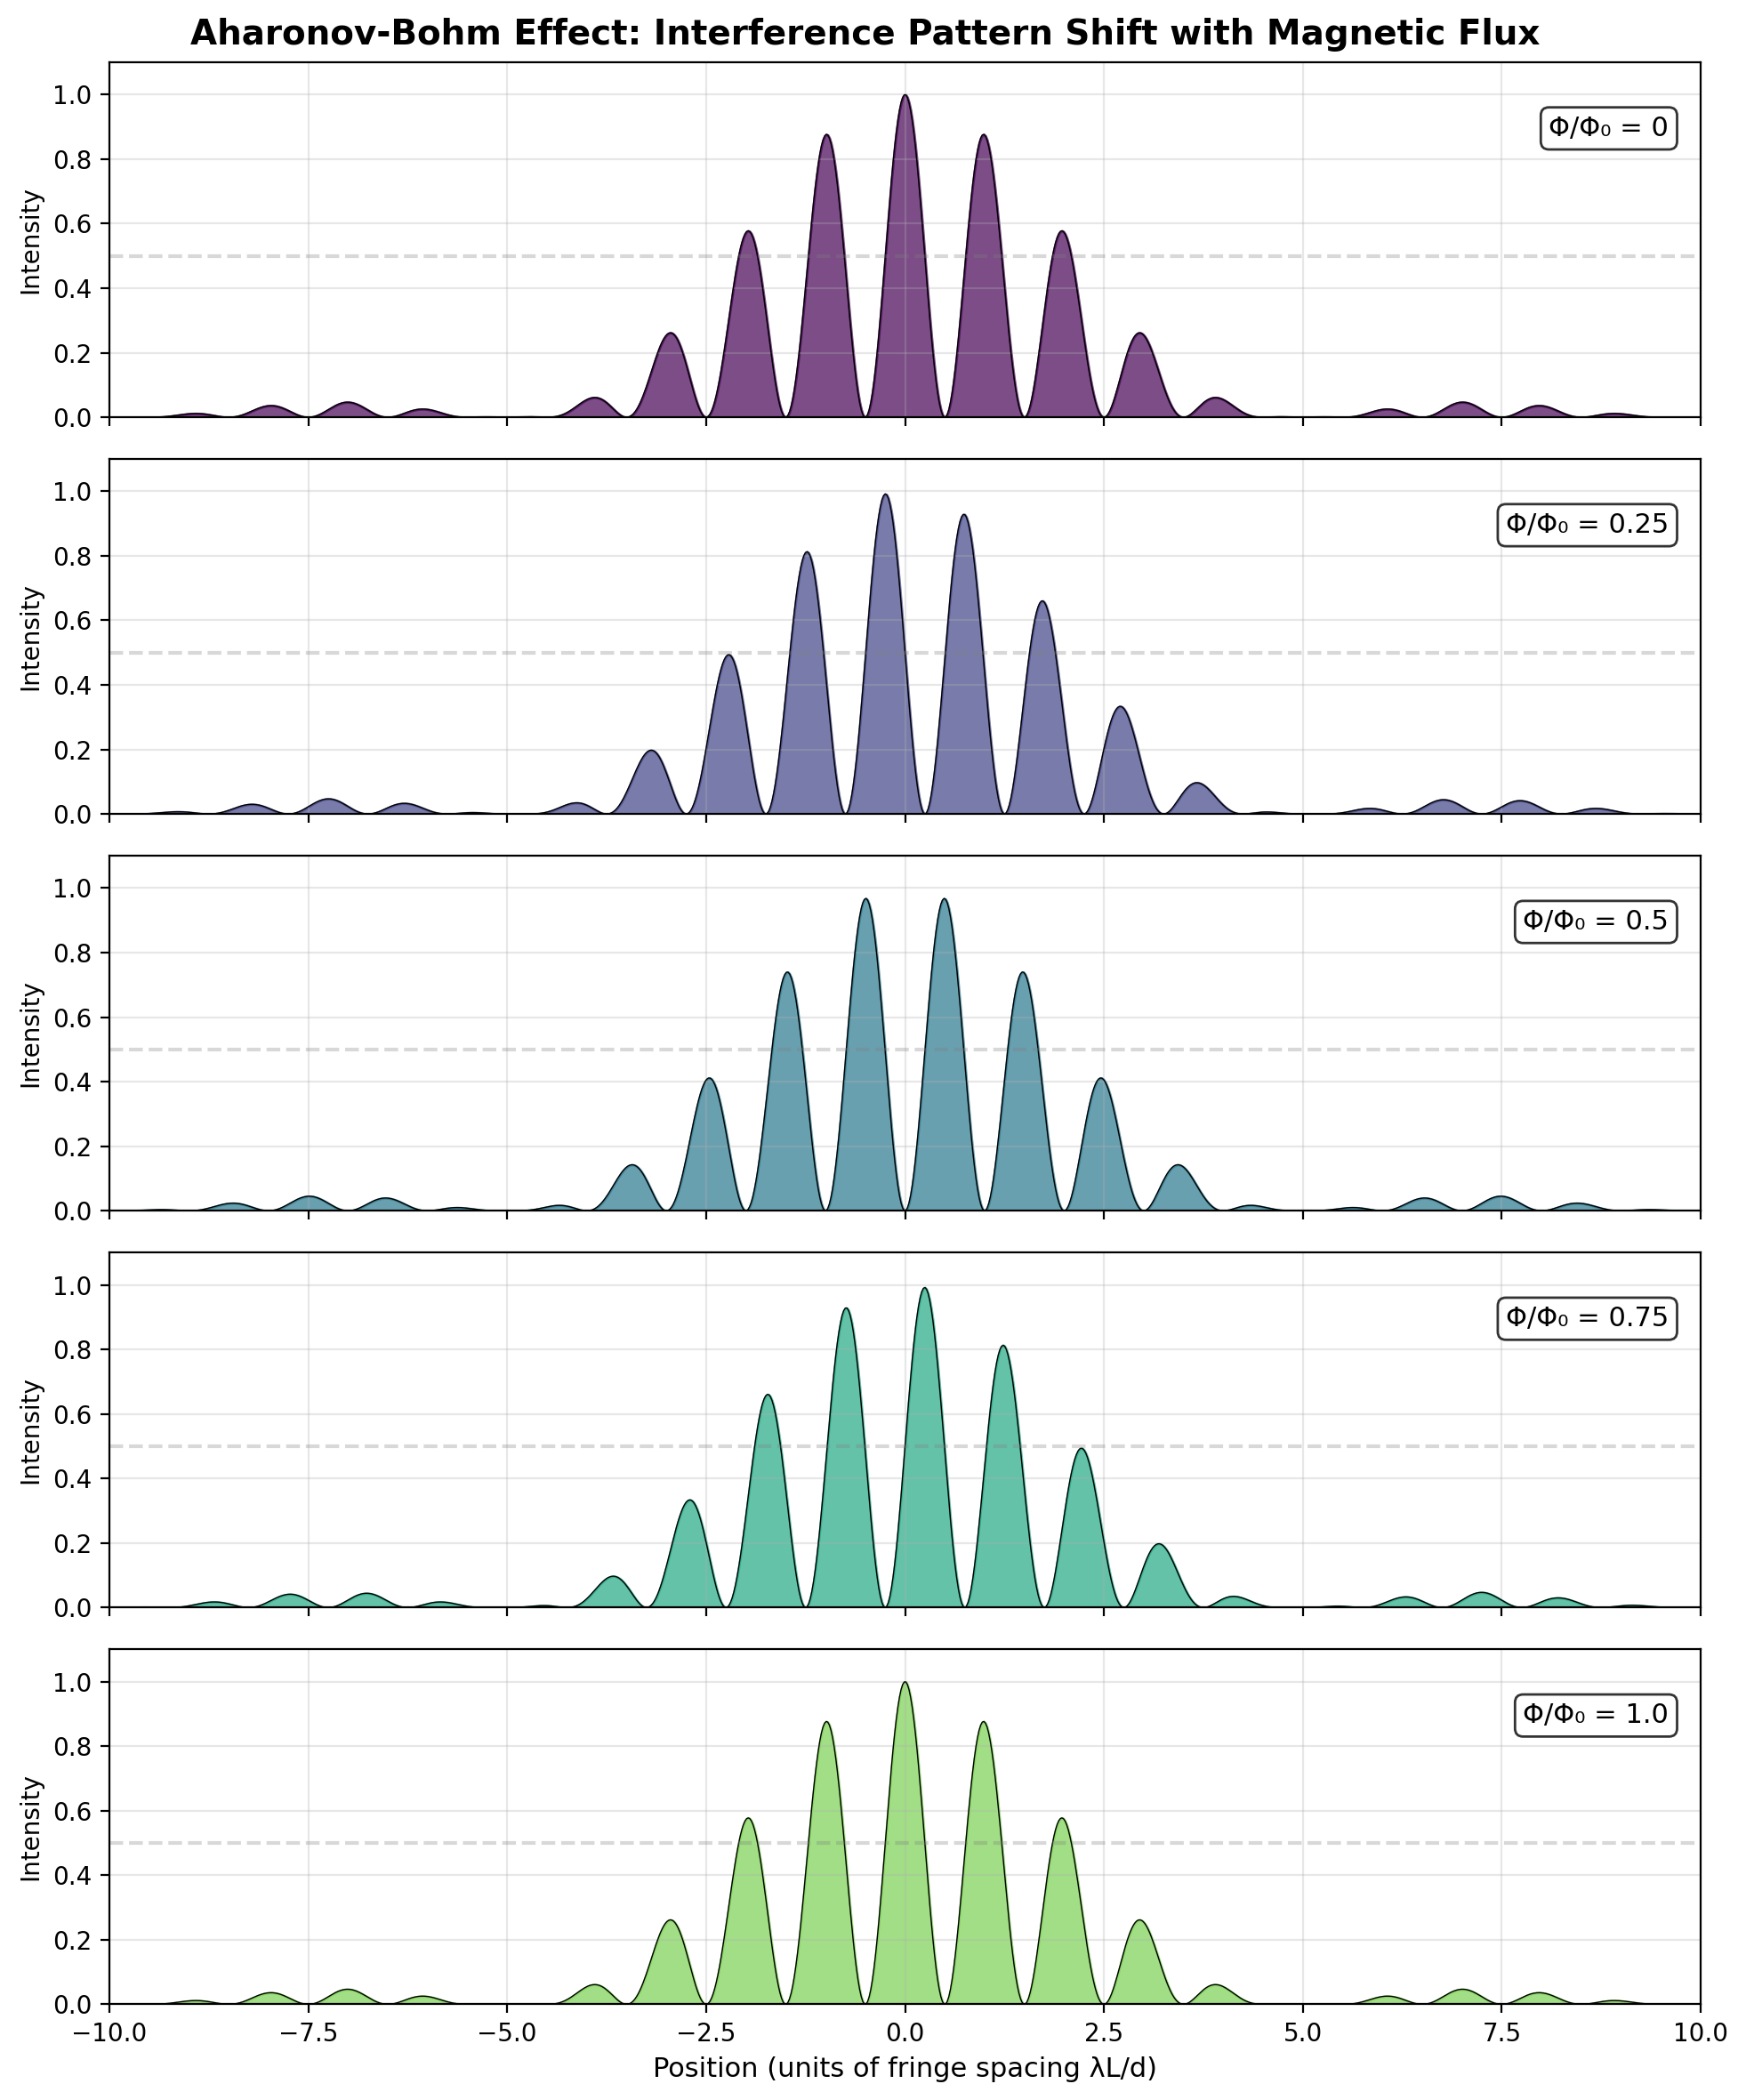


Note: At Φ/Φ₀ = 0.5, the pattern is shifted by half a fringe.
At Φ/Φ₀ = 1.0, the pattern returns to its original position (periodicity).


In [4]:
# Screen positions (in units of fringe spacing for clarity)
y_max = 10 * fringe_spacing
y = np.linspace(-y_max, y_max, 1000)

# Calculate interference patterns for different flux values
flux_ratios = [0, 0.25, 0.5, 0.75, 1.0]

fig, axes = plt.subplots(len(flux_ratios), 1, figsize=(10, 12), sharex=True)
fig.suptitle('Aharonov-Bohm Effect: Interference Pattern Shift with Magnetic Flux', 
             fontsize=14, fontweight='bold')

colors = plt.cm.viridis(np.linspace(0, 0.8, len(flux_ratios)))

for ax, flux_ratio, color in zip(axes, flux_ratios, colors):
    intensity = interference_intensity(y, d, L, wavelength, flux_ratio)
    
    ax.fill_between(y/fringe_spacing, 0, intensity, alpha=0.7, color=color)
    ax.plot(y/fringe_spacing, intensity, color='black', linewidth=0.5)
    
    ax.set_ylabel('Intensity', fontsize=10)
    ax.set_ylim(0, 1.1)
    ax.set_xlim(-10, 10)
    
    # Add flux label
    ax.text(0.98, 0.85, f'Φ/Φ₀ = {flux_ratio}', transform=ax.transAxes, 
            fontsize=11, ha='right', va='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.axhline(y=0.5, color='gray', linestyle='--', alpha=0.3)
    ax.grid(True, alpha=0.3)

axes[-1].set_xlabel('Position (units of fringe spacing λL/d)', fontsize=11)

plt.tight_layout()
plt.savefig('ab_interference_patterns.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nNote: At Φ/Φ₀ = 0.5, the pattern is shifted by half a fringe.")
print("At Φ/Φ₀ = 1.0, the pattern returns to its original position (periodicity).")

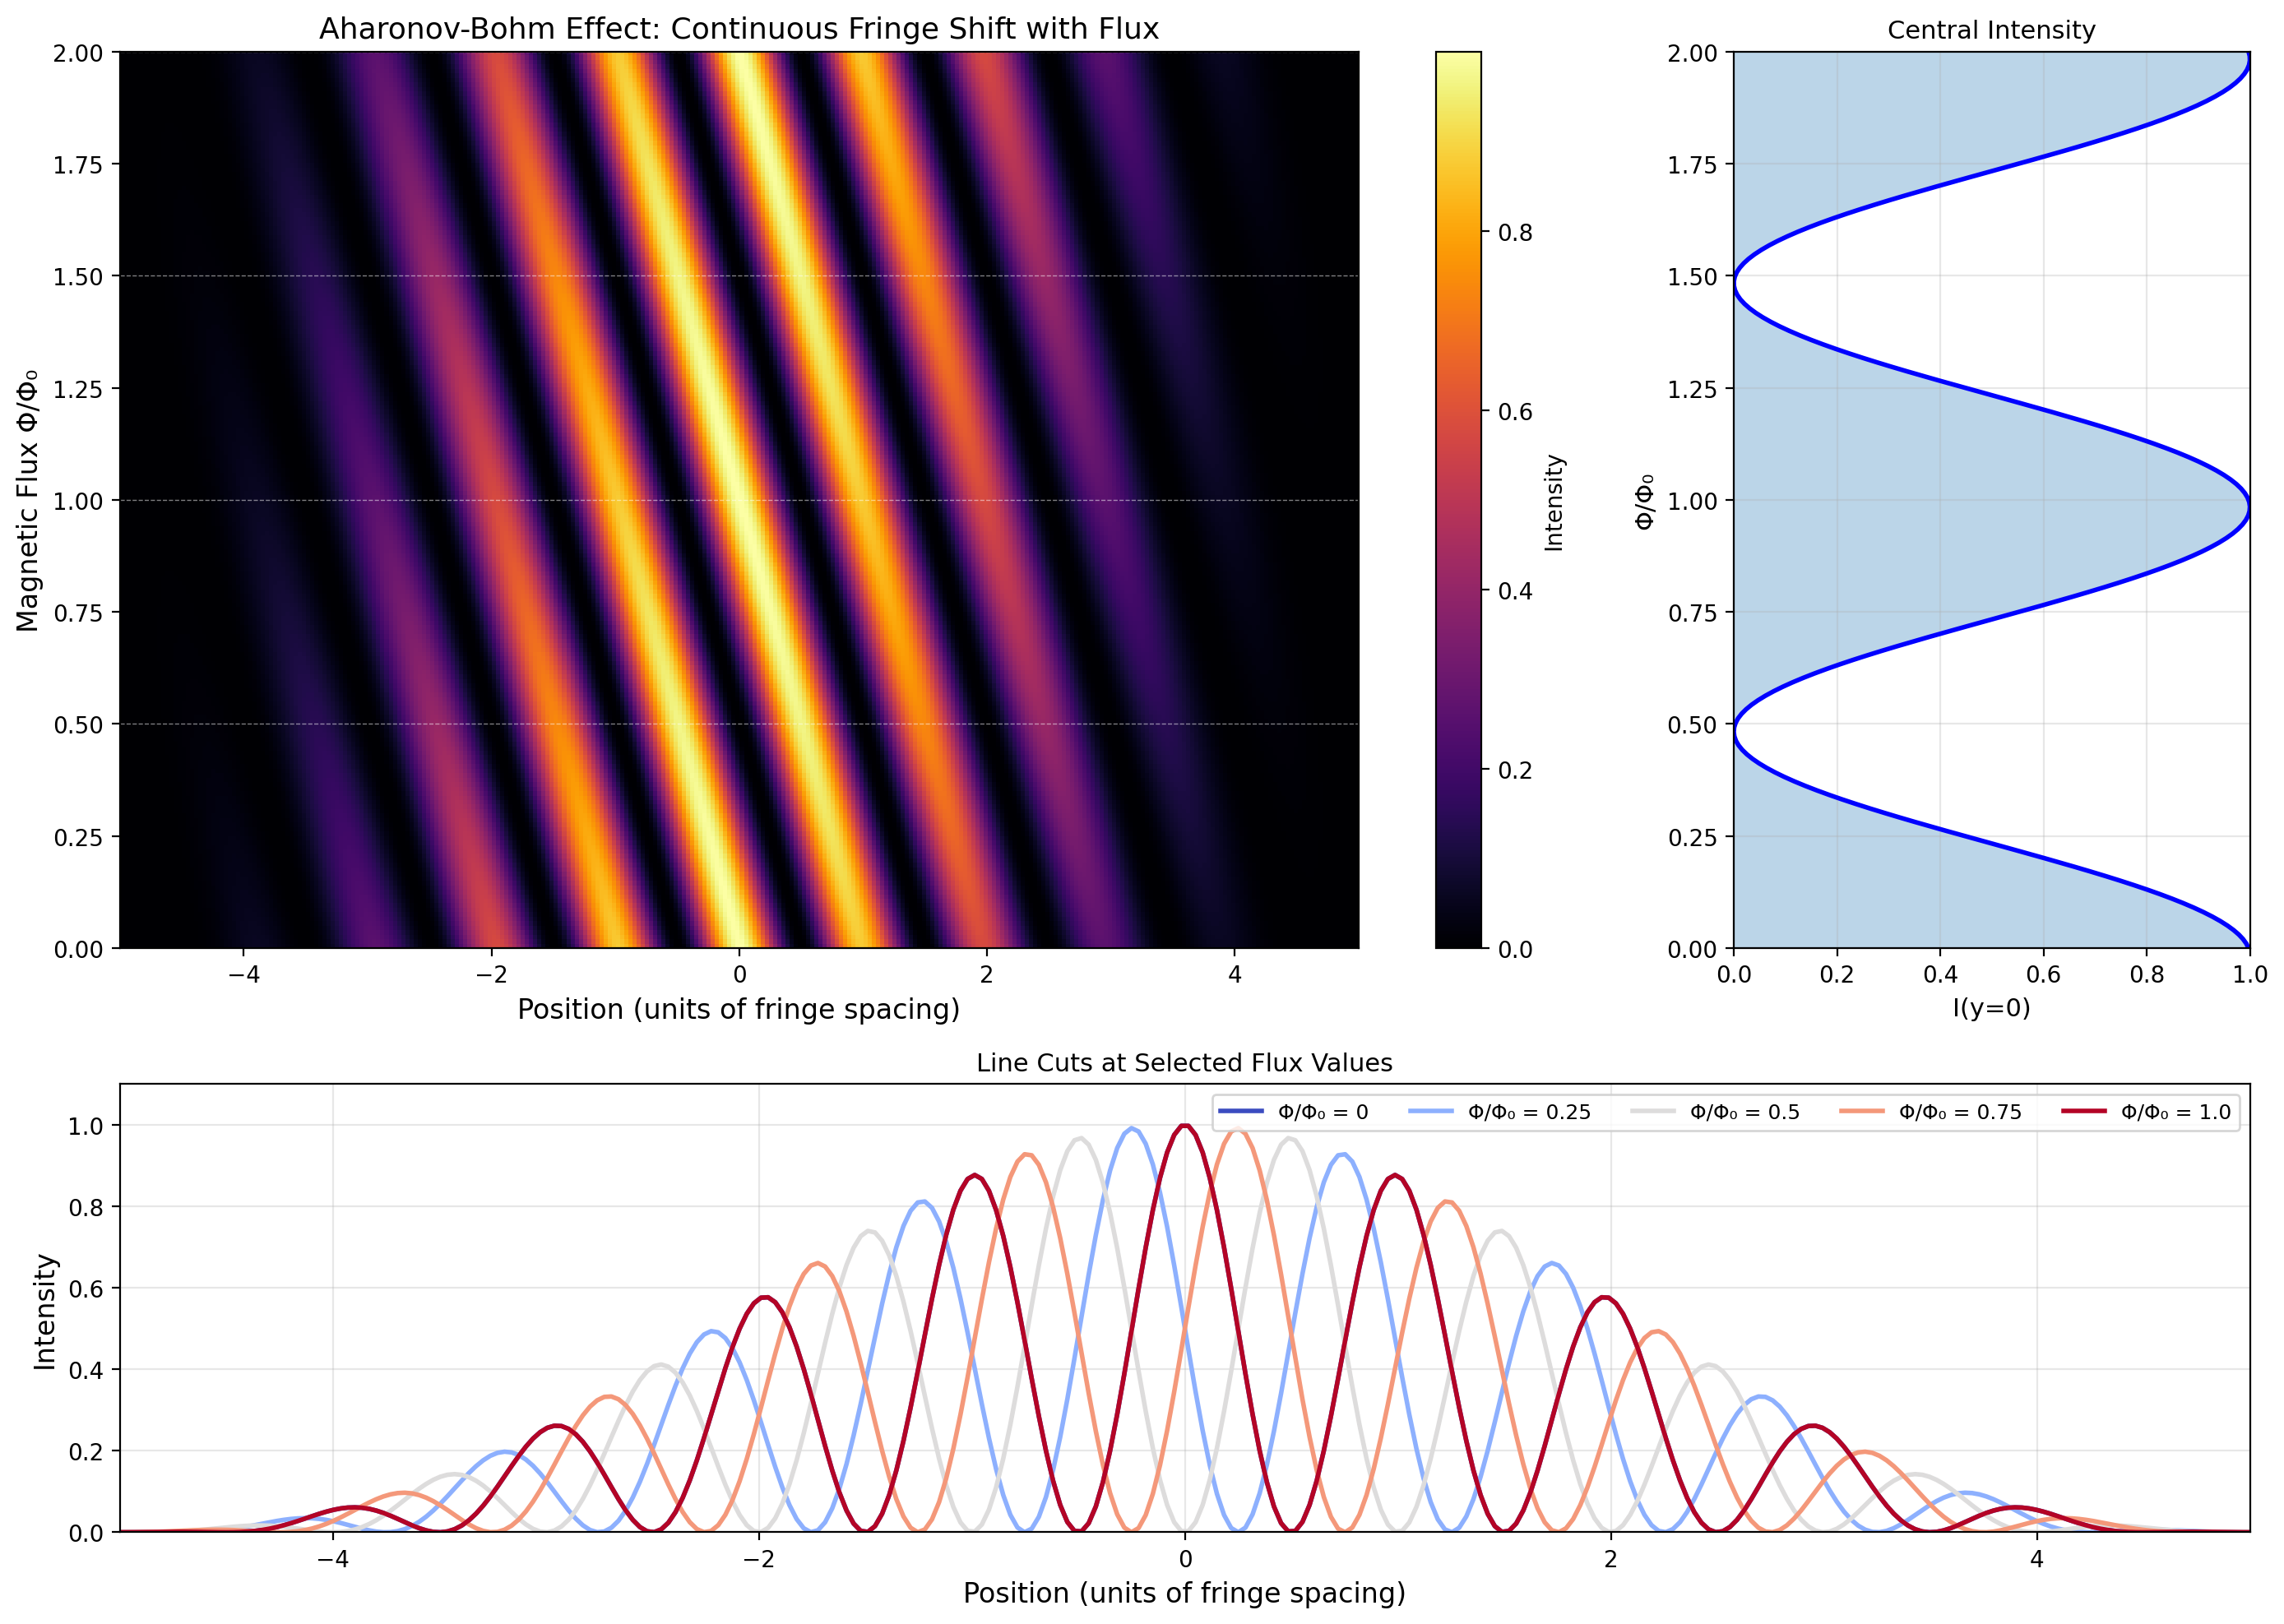

Comprehensive Aharonov-Bohm visualization saved to 'plot.png'


In [5]:
# Create a comprehensive visualization showing the phase shift continuously

flux_range = np.linspace(0, 2, 200)  # 0 to 2 flux quanta
y_positions = np.linspace(-5*fringe_spacing, 5*fringe_spacing, 300)

# Create 2D intensity map
intensity_map = np.zeros((len(flux_range), len(y_positions)))

for i, phi in enumerate(flux_range):
    intensity_map[i, :] = interference_intensity(y_positions, d, L, wavelength, phi)

# Plot
fig = plt.figure(figsize=(14, 10))
gs = GridSpec(2, 2, height_ratios=[2, 1], width_ratios=[3, 1])

# Main plot: 2D intensity map
ax1 = fig.add_subplot(gs[0, 0])
im = ax1.imshow(intensity_map, extent=[-5, 5, 0, 2], 
                aspect='auto', origin='lower', cmap='inferno')
ax1.set_xlabel('Position (units of fringe spacing)', fontsize=12)
ax1.set_ylabel('Magnetic Flux Φ/Φ₀', fontsize=12)
ax1.set_title('Aharonov-Bohm Effect: Continuous Fringe Shift with Flux', fontsize=13)

# Add horizontal lines at key flux values
for phi_val in [0.5, 1.0, 1.5, 2.0]:
    ax1.axhline(y=phi_val, color='white', linestyle='--', alpha=0.5, linewidth=0.5)

cbar = plt.colorbar(im, ax=ax1, label='Intensity')

# Side plot: Intensity at y=0 vs flux
ax2 = fig.add_subplot(gs[0, 1])
y_center_idx = len(y_positions) // 2
ax2.plot(intensity_map[:, y_center_idx], flux_range, 'b-', linewidth=2)
ax2.fill_betweenx(flux_range, 0, intensity_map[:, y_center_idx], alpha=0.3)
ax2.set_xlabel('I(y=0)', fontsize=11)
ax2.set_ylabel('Φ/Φ₀', fontsize=11)
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 2)
ax2.set_title('Central Intensity', fontsize=11)
ax2.grid(True, alpha=0.3)

# Bottom plot: Selected line cuts
ax3 = fig.add_subplot(gs[1, :])
selected_fluxes = [0, 0.25, 0.5, 0.75, 1.0]
colors = plt.cm.coolwarm(np.linspace(0, 1, len(selected_fluxes)))

for phi, color in zip(selected_fluxes, colors):
    intensity = interference_intensity(y_positions, d, L, wavelength, phi)
    ax3.plot(y_positions/fringe_spacing, intensity, color=color, 
             linewidth=2, label=f'Φ/Φ₀ = {phi}')

ax3.set_xlabel('Position (units of fringe spacing)', fontsize=12)
ax3.set_ylabel('Intensity', fontsize=12)
ax3.set_title('Line Cuts at Selected Flux Values', fontsize=11)
ax3.legend(loc='upper right', ncol=5, fontsize=9)
ax3.set_xlim(-5, 5)
ax3.set_ylim(0, 1.1)
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('aharonov_bohm_effect_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("Comprehensive Aharonov-Bohm visualization saved to 'plot.png'")

## Analysis of Results

### Key Observations

1. **Phase Periodicity**: The interference pattern is periodic in the magnetic flux with period $\Phi_0 = h/e$. This demonstrates the fundamental quantum nature of the effect.

2. **Half-Quantum Shift**: At $\Phi = \Phi_0/2$, the pattern shifts by exactly half a fringe period, converting maxima to minima and vice versa.

3. **Central Intensity Oscillation**: The intensity at the center of the screen oscillates as:
   $$I(y=0) = \cos^2\left(\pi\frac{\Phi}{\Phi_0}\right)$$

4. **Non-local Nature**: The electron beams never pass through the solenoid where $\mathbf{B} \neq 0$, yet the flux enclosed affects their quantum phase.

### Physical Interpretation

The Aharonov-Bohm effect reveals that:

- The electromagnetic potential $\mathbf{A}$ is not merely a mathematical convenience but has direct physical consequences
- Quantum mechanics exhibits non-local features that have no classical analogue
- The topology of the configuration space (paths encircling vs. not encircling the solenoid) determines physical outcomes

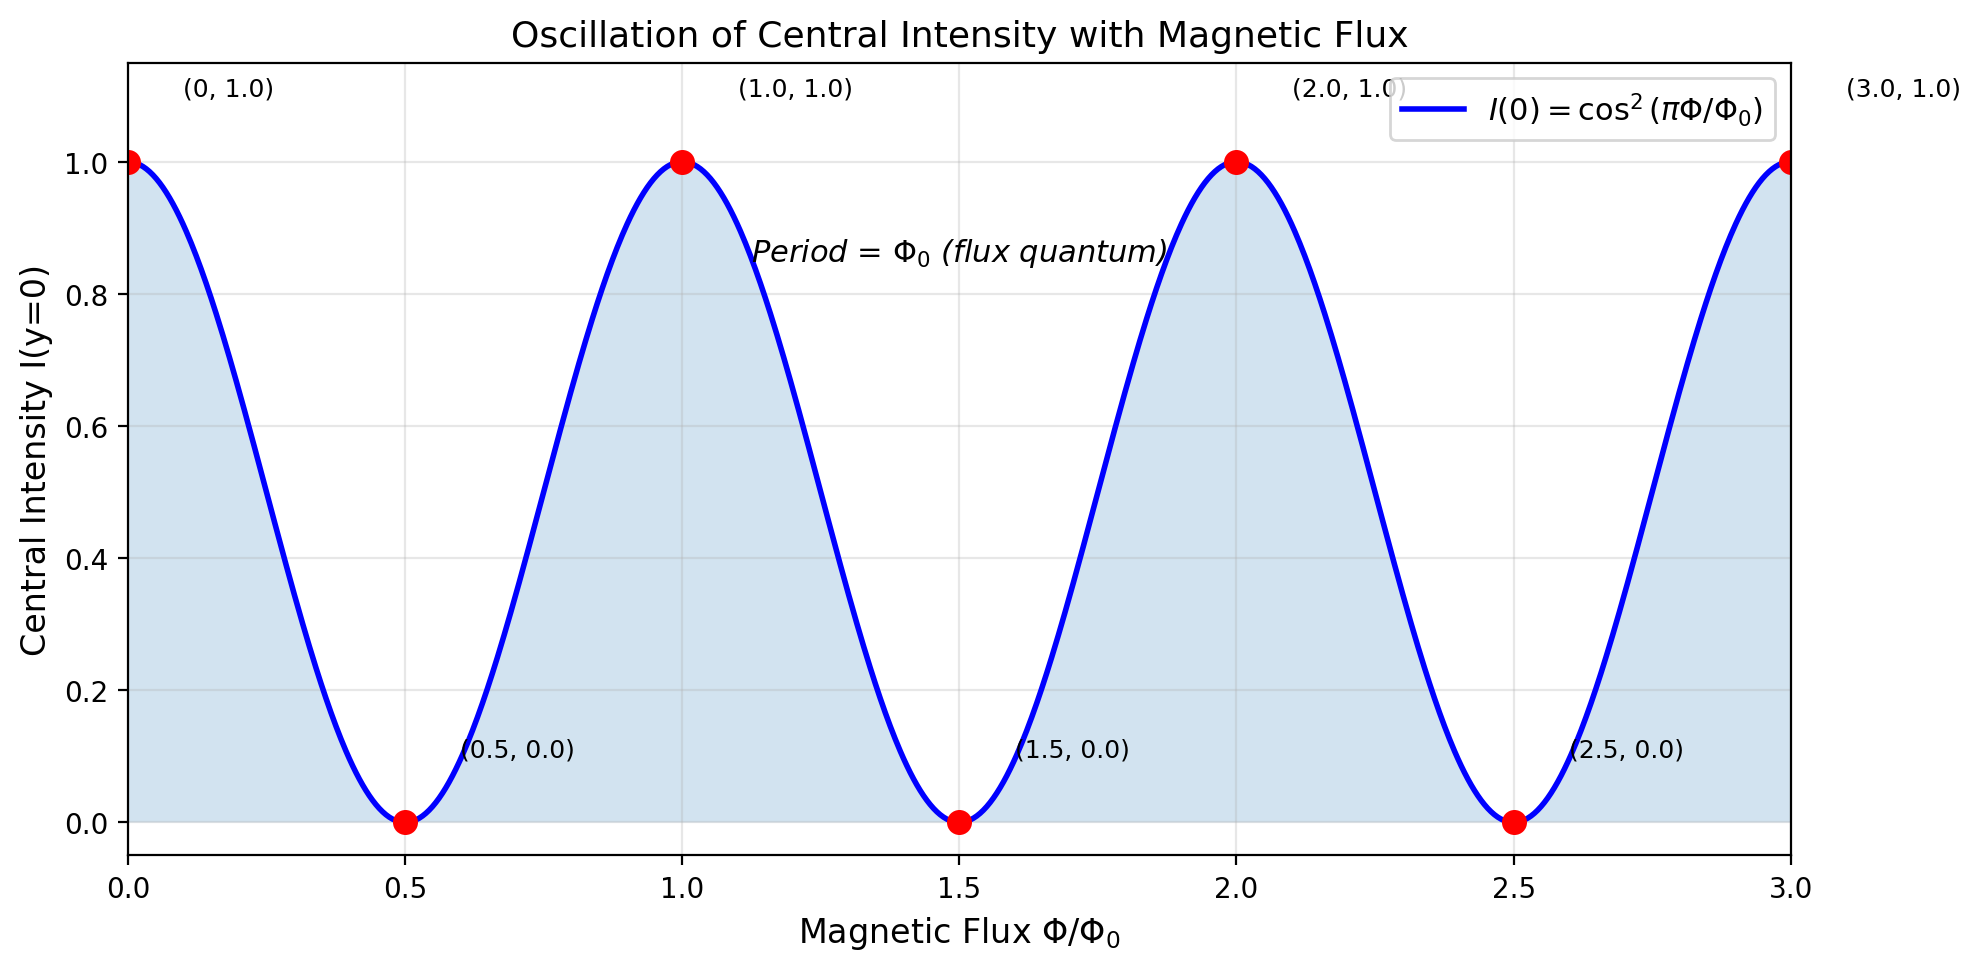


The central intensity oscillates with period Φ₀, reaching:
  • Maximum (I=1) at Φ/Φ₀ = 0, 1, 2, ... (integer multiples)
  • Minimum (I=0) at Φ/Φ₀ = 0.5, 1.5, 2.5, ... (half-integer multiples)


In [6]:
# Quantitative analysis: Central intensity oscillation

flux_fine = np.linspace(0, 3, 1000)
central_intensity = np.cos(np.pi * flux_fine)**2

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(flux_fine, central_intensity, 'b-', linewidth=2, label=r'$I(0) = \cos^2(\pi\Phi/\Phi_0)$')
ax.fill_between(flux_fine, 0, central_intensity, alpha=0.2)

# Mark special points
special_points = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
for phi in special_points:
    I_val = np.cos(np.pi * phi)**2
    ax.plot(phi, I_val, 'ro', markersize=8)
    ax.annotate(f'({phi}, {I_val:.1f})', xy=(phi, I_val), 
                xytext=(phi+0.1, I_val+0.1), fontsize=9)

ax.set_xlabel(r'Magnetic Flux $\Phi/\Phi_0$', fontsize=12)
ax.set_ylabel('Central Intensity I(y=0)', fontsize=12)
ax.set_title('Oscillation of Central Intensity with Magnetic Flux', fontsize=13)
ax.set_xlim(0, 3)
ax.set_ylim(-0.05, 1.15)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# Add text explaining periodicity
ax.text(1.5, 0.85, 'Period = $\Phi_0$ (flux quantum)', fontsize=11, 
        ha='center', style='italic')

plt.tight_layout()
plt.savefig('central_intensity_oscillation.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nThe central intensity oscillates with period Φ₀, reaching:")
print("  • Maximum (I=1) at Φ/Φ₀ = 0, 1, 2, ... (integer multiples)")
print("  • Minimum (I=0) at Φ/Φ₀ = 0.5, 1.5, 2.5, ... (half-integer multiples)")

## Experimental Verification

The Aharonov-Bohm effect was first confirmed experimentally by Chambers (1960) and later with greater precision by Tonomura et al. (1986) using electron holography with superconducting toroids.

### Experimental Challenges

1. **Magnetic shielding**: The solenoid must be perfectly shielded to ensure $\mathbf{B} = 0$ in the electron paths
2. **Coherence**: Electrons must maintain quantum coherence over the path length
3. **Flux stability**: The magnetic flux must be stable during measurement

### Applications

- **SQUID magnetometers**: Superconducting Quantum Interference Devices use the AB effect for ultra-sensitive magnetic field measurements
- **Electron holography**: Phase imaging in transmission electron microscopy
- **Quantum computing**: Understanding and manipulating geometric phases

## Conclusion

The Aharonov-Bohm effect demonstrates that quantum mechanics requires a more fundamental role for electromagnetic potentials than classical physics suggests. The observable phase shift, despite the electron never encountering the magnetic field directly, challenges our intuitions about locality and the nature of physical observables. This effect remains a cornerstone in our understanding of gauge theories and topological phases in quantum systems.

In [7]:
# Summary: Print key equations and values
print("="*60)
print("AHARONOV-BOHM EFFECT: KEY RESULTS")
print("="*60)
print()
print("Fundamental Equations:")
print("-" * 40)
print("AB Phase shift:        ΔφAB = 2π(Φ/Φ₀)")
print("Flux quantum:          Φ₀ = h/e ≈ 4.136 × 10⁻¹⁵ Wb")
print("Central intensity:     I(0) = cos²(πΦ/Φ₀)")
print()
print("Simulation Parameters:")
print("-" * 40)
print(f"Electron energy:       E = {electron_energy_eV/1e3:.0f} keV")
print(f"de Broglie wavelength: λ = {wavelength*1e12:.4f} pm")
print(f"Slit separation:       d = {d*1e9:.0f} nm")
print(f"Fringe spacing:        Δy = {fringe_spacing*1e6:.2f} μm")
print()
print("Physical Significance:")
print("-" * 40)
print("• Potentials A, φ have direct physical meaning in QM")
print("• Effect is topological (depends on enclosed flux)")
print("• Demonstrates non-local quantum correlations")
print("• Period in flux: Φ₀ = h/e (flux quantum)")
print("="*60)

AHARONOV-BOHM EFFECT: KEY RESULTS

Fundamental Equations:
----------------------------------------
AB Phase shift:        ΔφAB = 2π(Φ/Φ₀)
Flux quantum:          Φ₀ = h/e ≈ 4.136 × 10⁻¹⁵ Wb
Central intensity:     I(0) = cos²(πΦ/Φ₀)

Simulation Parameters:
----------------------------------------
Electron energy:       E = 50 keV
de Broglie wavelength: λ = 5.4847 pm
Slit separation:       d = 500 nm
Fringe spacing:        Δy = 10.97 μm

Physical Significance:
----------------------------------------
• Potentials A, φ have direct physical meaning in QM
• Effect is topological (depends on enclosed flux)
• Demonstrates non-local quantum correlations
• Period in flux: Φ₀ = h/e (flux quantum)
